# Proses Ektraksi Fitur Colorfull Dataset

### Importing Library

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os

%matplotlib inline

In [62]:
import os
import glob
from tqdm import tqdm

### Ektraksi Fitur Data

In [63]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_fitur(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    if (show_chart):
        # sort to ensure correct color percentage
        counts = dict(sorted(counts.items()))

        center_colors = clf.cluster_centers_

        # We get ordered colors by iterating through the keys
        ordered_colors = [center_colors[i] for i in counts.keys()]
        hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
        rgb_colors = [ordered_colors[i] for i in counts.keys()]

        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    #convert fitur to np array
    fitur = np.zeros((20,1))
    for i in range(len(counts)):
        fitur[i] = counts[i]
        
    return fitur

[[ 1827.]
 [46606.]
 [23124.]
 [22890.]
 [ 5668.]
 [ 5407.]
 [15114.]
 [34126.]
 [15412.]
 [12353.]
 [ 1888.]
 [ 4321.]
 [17197.]
 [11419.]
 [ 5784.]
 [ 1729.]
 [ 4112.]
 [ 4105.]
 [ 5001.]
 [ 1917.]]


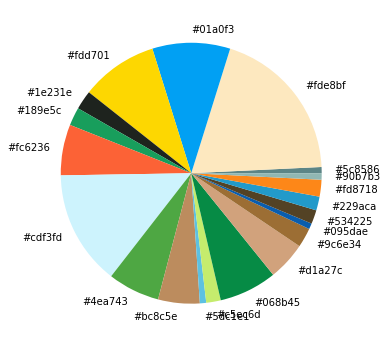

In [64]:
eks_fit = get_fitur(get_image('yes.png'), 20, True)
print(eks_fit)

### Ekstraksi Fitur Pada Dataset

In [43]:
def iscolorfull(filename):
    color = 1
    for fname in filename.split('\\')[1].split('_'):
        if 'nocolor' in fname:
            color -= 1
    return color

In [55]:
def ekstraksi_fitur(folder_name):
    folder = []
    for fkelas in os.listdir(folder_name):
        for img in glob.glob(folder_name+fkelas+"/*"):
            kelas = iscolorfull(img)
            folder.append([img, kelas])

    fitur = []
    target = []

    pbar = tqdm(range(len(folder)), desc=("Processing Ekstrasi Fitur on Folder %s\n" % folder_name), leave=True)
    for i in pbar:
        img   = folder[i][0]
        kelas = folder[i][1]
        img_input = get_image(img)
        img_fitur = get_fitur(img_input, 20, False)
        fitur.append(img_fitur)
        target.append(kelas)
    
    return (fitur, target)

In [56]:
folder_name = 'train/'
(fitur, target) = ekstraksi_fitur(folder_name)









Processing Ekstrasi Fitur on Folder train/
:   0%|          | 0/176 [00:00<?, ?it/s]







Processing Ekstrasi Fitur on Folder train/
:   1%|          | 1/176 [00:10<30:29, 10.46s/it]







Processing Ekstrasi Fitur on Folder train/
:   1%|          | 2/176 [00:24<33:04, 11.40s/it]







Processing Ekstrasi Fitur on Folder train/
:   2%|▏         | 3/176 [00:42<39:23, 13.66s/it]







Processing Ekstrasi Fitur on Folder train/
:   2%|▏         | 4/176 [01:01<43:23, 15.14s/it]







Processing Ekstrasi Fitur on Folder train/
:   3%|▎         | 5/176 [01:29<54:24, 19.09s/it]







Processing Ekstrasi Fitur on Folder train/
:   3%|▎         | 6/176 [01:50<55:09, 19.47s/it]







Processing Ekstrasi Fitur on Folder train/
:   4%|▍         | 7/176 [02:10<55:05, 19.56s/it]







Processing Ekstrasi Fitur on Folder train/
:   5%|▍         | 8/176 [02:44<1:07:39, 24.16s/it]







Processing Ekstrasi Fitur on Folder train/
:   5%|▌         | 9/176 [03:12<1:10:16, 25.25s/it]





:  46%|████▌     | 81/176 [25:27<29:04, 18.36s/it]







Processing Ekstrasi Fitur on Folder train/
:  47%|████▋     | 82/176 [25:38<25:32, 16.31s/it]







Processing Ekstrasi Fitur on Folder train/
:  47%|████▋     | 83/176 [25:50<23:06, 14.91s/it]







Processing Ekstrasi Fitur on Folder train/
:  48%|████▊     | 84/176 [26:06<23:08, 15.10s/it]







Processing Ekstrasi Fitur on Folder train/
:  48%|████▊     | 85/176 [26:19<22:06, 14.58s/it]







Processing Ekstrasi Fitur on Folder train/
:  49%|████▉     | 86/176 [26:36<22:53, 15.26s/it]







Processing Ekstrasi Fitur on Folder train/
:  49%|████▉     | 87/176 [27:04<28:19, 19.09s/it]







Processing Ekstrasi Fitur on Folder train/
:  50%|█████     | 88/176 [27:27<29:50, 20.35s/it]







Processing Ekstrasi Fitur on Folder train/
:  51%|█████     | 89/176 [27:53<31:49, 21.95s/it]







Processing Ekstrasi Fitur on Folder train/
:  51%|█████     | 90/176 [28:16<31:53, 22.25s/it]







Processing Ekstrasi Fitur on Fold

Processing Ekstrasi Fitur on Folder train/
:  92%|█████████▏| 162/176 [52:27<04:23, 18.83s/it]







Processing Ekstrasi Fitur on Folder train/
:  93%|█████████▎| 163/176 [52:42<03:49, 17.68s/it]







Processing Ekstrasi Fitur on Folder train/
:  93%|█████████▎| 164/176 [53:01<03:35, 17.98s/it]







Processing Ekstrasi Fitur on Folder train/
:  94%|█████████▍| 165/176 [53:19<03:17, 17.95s/it]







Processing Ekstrasi Fitur on Folder train/
:  94%|█████████▍| 166/176 [53:37<03:00, 18.07s/it]







Processing Ekstrasi Fitur on Folder train/
:  95%|█████████▍| 167/176 [54:17<03:40, 24.50s/it]







Processing Ekstrasi Fitur on Folder train/
:  95%|█████████▌| 168/176 [54:46<03:27, 25.96s/it]







Processing Ekstrasi Fitur on Folder train/
:  96%|█████████▌| 169/176 [55:15<03:06, 26.67s/it]







Processing Ekstrasi Fitur on Folder train/
:  97%|█████████▋| 170/176 [55:40<02:37, 26.28s/it]







Processing Ekstrasi Fitur on Folder train/
:  97%|█████████▋| 171/176 [56:01<02:02

In [58]:
print(fitur)
print(target)

[array([[85055.],
       [ 8172.],
       [13081.],
       [49538.],
       [20881.],
       [ 4424.],
       [ 5544.],
       [ 1379.],
       [ 4329.],
       [  919.],
       [ 2665.],
       [ 9067.],
       [ 8647.],
       [ 1021.],
       [13625.],
       [ 1406.],
       [ 1439.],
       [ 2005.],
       [ 1021.],
       [ 5782.]]), array([[ 28650.],
       [105170.],
       [ 25987.],
       [ 12404.],
       [ 25473.],
       [  1004.],
       [  5676.],
       [  1074.],
       [  4239.],
       [  6361.],
       [  1406.],
       [  1418.],
       [   746.],
       [  3211.],
       [  1012.],
       [   985.],
       [  1156.],
       [   360.],
       [ 12984.],
       [   684.]]), array([[88669.],
       [27481.],
       [ 2367.],
       [ 1161.],
       [21309.],
       [ 6742.],
       [31397.],
       [ 3999.],
       [ 1213.],
       [18860.],
       [ 1689.],
       [14468.],
       [ 1026.],
       [10506.],
       [ 1043.],
       [ 2997.],
       [ 1244.],
      

       [  5860.]])]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [60]:
output_file = open("data/dataset_color.csv", 'w')
output_file.write('datano,')
for i in range(20):
    output_file.write('fitur%s,' % (i))
output_file.write('kelas\n')

for i, f in enumerate(fitur):
    output_file.write('%d,' % (i))
    for ft in f:
        output_file.write('%d,' % (ft))
    output_file.write('%d\n' % (-1 if target[i] == 0 else 1))

output_file.close()
print("Processing finished.")

Processing finished.
